In [1]:
import random
from collections import Counter,OrderedDict
from matplotlib import pyplot as plt

# Assigning doors and prizes

In [2]:
prizes = ["Ferrari","Goat1","Goat2"]
result = []
# Play n = 500 games
n = 500
# Now, simulates n games with both swtiching and staying
sample_mean = []
games = []
for game in range(n):
    # Randomly assign the prizes to each door
    shuffled_prizes = random.sample(prizes,len(prizes))
    doors = {f"Door {k+1}":v for k,v in enumerate(shuffled_prizes)}
    games.append(doors)
    
games[0:5]


[{'Door 1': 'Ferrari', 'Door 2': 'Goat1', 'Door 3': 'Goat2'},
 {'Door 1': 'Goat2', 'Door 2': 'Goat1', 'Door 3': 'Ferrari'},
 {'Door 1': 'Goat1', 'Door 2': 'Goat2', 'Door 3': 'Ferrari'},
 {'Door 1': 'Goat1', 'Door 2': 'Goat2', 'Door 3': 'Ferrari'},
 {'Door 1': 'Goat2', 'Door 2': 'Goat1', 'Door 3': 'Ferrari'}]

## Checking the randomization

Text(0.5, 1.0, 'Door3')

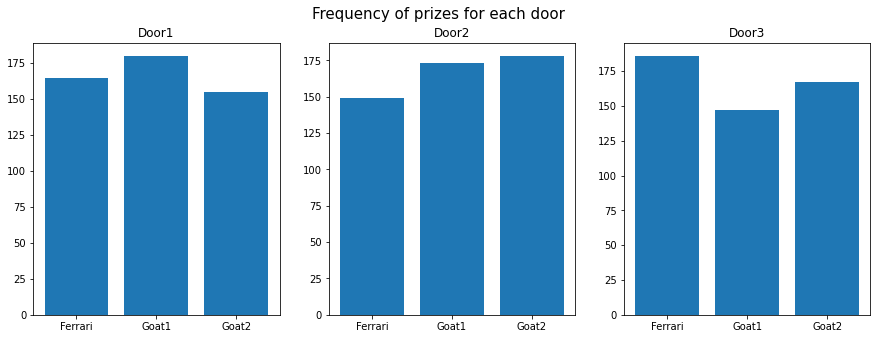

In [3]:
'''
If the randomization is valid, the frequency of each 
prize for each door must be uniformly distributed.
'''

door1_frequency = {k:v for k,v in sorted(Counter([game["Door 1"] for game in games]).items())}
door2_frequency = {k:v for k,v in sorted(Counter([game["Door 2"] for game in games]).items())}
door3_frequency = {k:v for k,v in sorted(Counter([game["Door 3"] for game in games]).items())}


fig, axes = plt.subplots(1,3,figsize = (15,5))
fig.suptitle("Frequency of prizes for each door",fontsize = 15)
axes[0].bar(door1_frequency.keys(),door1_frequency.values())
axes[0].set_title("Door1")
axes[1].bar(door2_frequency.keys(),door2_frequency.values())
axes[1].set_title("Door2")
axes[2].bar(door3_frequency.keys(),door3_frequency.values())
axes[2].set_title("Door3")

#The frequency looks very uniformly distributed for each door,

# Simulation

In [4]:
# So far, we have n = 1000 games. Now, with each strategy, we will track 
#  the number of winnings(get a car) and compute it's sample mean. 

doors = list(games[0].keys())


## Strategy 1 : staying at the first choice

In [5]:
# We can readily know that if you stay, your first pick determines everything. so, no futher computation needed once
#  first pick is determined
stay_winning_count = 0
stay_cumulative_winning_count = []
pick =[] # save your first pick to do the "what if I have switched".
for i,game in enumerate(games):
    pick.append("".join(random.sample(doors,1)))
    if(game.get(pick[i]) == "Ferrari"):
        stay_winning_count +=1
    stay_cumulative_winning_count.append(stay_winning_count) #tracking the cumulative winning count
# Theoretically, the chance should be P(stay,win) = 1/3
print(f"The experimental result is {(stay_winning_count/n):.3}")

# Obviously, the result of staying is almost same as theoretical answer.

The experimental result is 0.33


## Strategy 2 : switching from the first choice

In [6]:
# To have exact experiemental result, I will simulate the game as it was given even though it is a bit redundant.

In [7]:
switch_winning_count = 0
switch_cumulative_winning_count =[]


for i,game in enumerate(games):
    remaining_doors = doors.copy()
   
    remaining_doors.remove(pick[i])
    
    if(game.get(pick[i]) == "Ferrari"):
        host_opening = "".join(random.sample(remaining_doors,1)) #chopse random goat door to open
        remaining_doors.remove(host_opening) # remove the opened door from your next selection.
        
        second_pick = "".join(remaining_doors) # switch to the unopened door
       
        if(game.get(second_pick) == "Ferrari"):
            switch_winning_count +=1
           

    else:
     
        host_opening = "".join([door for door in remaining_doors 
                                   if door != pick[i] and game.get(door) != "Ferrari"])
        remaining_doors.remove(host_opening) #host opened the other goat door
        second_pick = "".join(remaining_doors) # switch to the unopned door
        if(game.get(second_pick) == "Ferrari"):
            switch_winning_count +=1
            
    switch_cumulative_winning_count.append(switch_winning_count)#tracking the cumulative winning count
    
# Theoretically, the chance should be P(switch,win) = 2/3
print(f"The experimental result of switching is {(switch_winning_count/n):.3}")
    
    

The experimental result of switching is 0.67


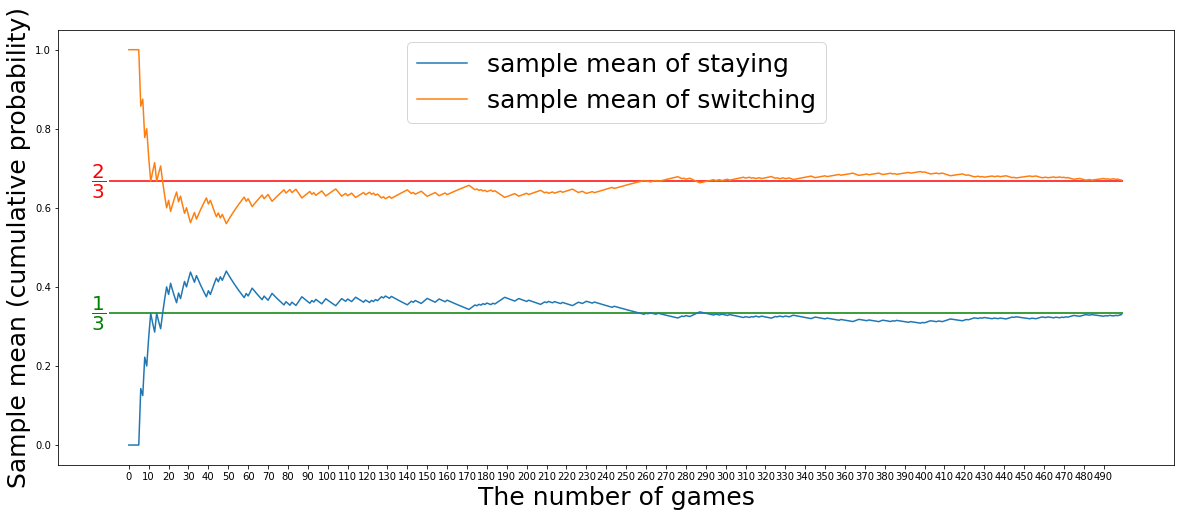

In [8]:
plt.figure(figsize=(20, 8))
plt.plot(range(n), [x/(i+1) for i,x in enumerate(stay_cumulative_winning_count)],label = 'sample mean of staying')
plt.plot(range(n), [y/(i+1) for i,y in enumerate(switch_cumulative_winning_count)],label = 'sample mean of switching')
plt.legend(loc = 9,prop={'size': 25})
plt.xlabel("The number of games",fontsize = 25)
plt.ylabel("Sample mean (cumulative probability)",fontsize = 25)
plt.xticks([x*10 for x in range(50)])
plt.hlines(y = 2/3,xmin = -10, xmax = 500,color = 'r')
plt.text(-22, 2/3, r' $\dfrac{2}{3}$', ha ='left', va ='center',fontsize = 20,color = "red")
plt.hlines(y = 1/3,xmin = -10, xmax = 500,color = 'g')
plt.text(-22, 1/3, r' $\dfrac{1}{3}$', ha ='left', va ='center',fontsize = 20,color = "g")
plt.show()


## Comments about the plot

* The sample mean of staying strategy converges to 1/3 while switching strategy convers to 2/3.
* It is almost identical to the theoretical result as I calulated in my blog.
* Moreover, there is a surprising fact that the plot is symmetric about 1/2. It's becuase the switching\
   is THE COMPLEMENT of staying, that is P(Switching) = 1 - P(Staying).
* It is reasonable because there is only two doors left after the host open one, and it implies that
   this is the binomial descision. 